Radial Velocity Offsets (rv_offset)
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.ipynb) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In [3]:
b.add_dataset('rv', times=np.linspace(0,1,101), dataset='rv01')

<ParameterSet: 42 parameters | contexts: figure, constraint, dataset, compute>

In [4]:
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_func', 'logarithmic')
b.set_value_all('ld_coeffs', [0.0, 0.0])
b.set_value_all('atm', 'blackbody')

Relevant Parameters
--------------------

Radial velocity offsets allow for a per-component and per-dataset offset applied to the synthetic RVs.

First let's run a model without any offsets applied.

In [5]:
b.run_compute(model='without_offset')

<ParameterSet: 6 parameters | contexts: model, figure>

and now let's look at the `rv_offset` parameters and set an offset for the primary RV.

In [6]:
print(b.filter(qualifier='rv_offset'))

ParameterSet: 2 parameters
  rv_offset@primary@rv01@dataset: 0.0 km / s
  rv_offset@secondary@rv01@da...: 0.0 km / s


In [7]:
b.set_value(qualifier='rv_offset', component='primary', value=25)

Now let's run another model, with the offset applied to the primary component.

In [8]:
b.run_compute(model='with_offset')

<ParameterSet: 6 parameters | contexts: model, figure>

Influence on Radial Velocities
------------------

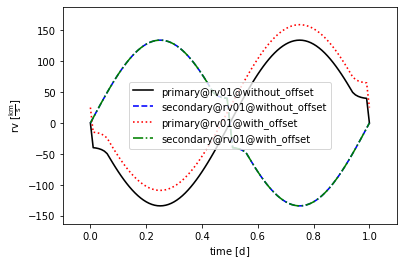

In [9]:
afig, mplfig = b.plot(legend=True, show=True)

Here we see the constant rv_offset applied to the synthetic RVs for the primary star.